In [1]:
sample_1 = [63, 63, 64, 62, 65, 59, 61, 62, 60, 60]
sample_2 = [59, 62, 59, 58, 59, 53, 76, 69, 54, 59]
sample_3 = [59, 63, 54, 63, 59, 67, 62, 54, 59, 58]


#I obtained samples from diferent stores in Nairobi and manually counted the sticks in each box.
#In all, I bought 10 packs (each containing 10 boxes) for this experiment
#Each sample represents a pack of ten boxes, while each entry in the sample array represents the number of sticks in every box in a given pack.

In [2]:
#Make sure that all samples contain 10 boxes
assert len(sample_1) == len(sample_2) == len(sample_3) ==10

The manufacturer claims that each box contains at least 60 matchsticks. We will have this as the null, and perform eperiments to put the claim to test.

Null hypotheses: a machbox contains at least 60 match sticks
Alternative: a matchbox contains less than 60 match sticks

Let X represent the number of sticks in one matchbox\
H<sub>0</sub> : X >= 60\
H<sub>1</sub> : X > 60

In [3]:
#import the necessary libraries
#pandas will be important for managing the on-memory dataframe
#numpy will be used for numerical computations
#matplotlib will be used for plotting figures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#enssure that the generated plots will be displayed in the notebook
%matplotlib inline

In [5]:
#unbox the samples
full_sample = [*sample_1, *sample_2, *sample_3]

In [6]:
#build the on-memory dataframe using pandas
df = pd.DataFrame({'no_of_sticks': full_sample})

In [7]:
#peek into the generated dataframe
df.head()

,no_of_sticks
0,63
1,63
2,64
3,62
4,65


In [8]:
#Take 20 samples from the sample pool, generate the mean(expected number of sticks for each matchbox)
#This will be repeated 10000 times, so as to get as close to the population parameter as possible. This is in line with the law of large numbers
sample = []
for _ in range(10000):
    bootstrap = df.sample(20, replace=True)
    sample.append(bootstrap['no_of_sticks'].mean())

In [9]:
#print the mean and standard deviation from the bootstrapped sample
np.mean(sample), np.std(sample)

(60.823609999999995, 1.0264906565088645)

In [10]:
#We expect that the samples should generate a normal distribution
#So we generate a normal distribution whose mean is the the value that is closest to the alternative while still being under the null, and standrd deviation equal to the one from the bootstrapped sample
random = np.random.normal(loc=60, size=1000000, scale=np.std(sample))

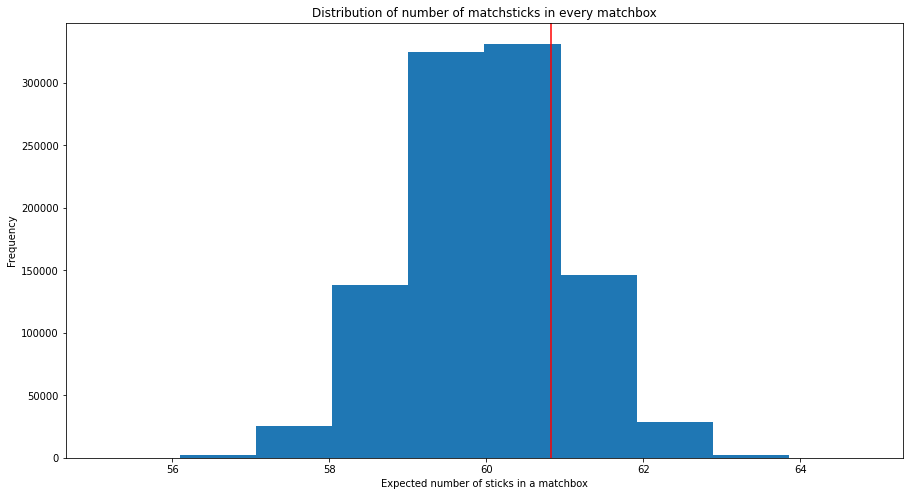

In [11]:
#We plot the generated distribution and find how plausible it is that the sample statistic was generted from the null
plt.figure(figsize=(15, 8));
plt.hist(random);
plt.title('Distribution of number of matchsticks in every matchbox');
plt.xlabel('Expected number of sticks in a matchbox');
plt.ylabel('Frequency');
plt.axvline(x=np.mean(sample), color='r');

The plot above suggests that our sample statistic is very much in the expected range. It could, therefore, be true that each matchbox contains at least 60 sticks. We evaluate this more scientifically using p-value in the cell below.

In [12]:
#We want to obtain the proportion of random values generated in our Gaussian distribution that are greater than the sample mean
#This computation will return the p-value
(random < np.mean(sample)).mean()

0.789208

Such a high p-value provides support for the null hypothesis. We therefore fail to reject the null in this case and conclude that each matchbox contains at least 60 sticks. The boxes that do not conform to this are probably due to an element of randomness.